In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive 


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
cd /gdrive/My\ Drive/nn 

/gdrive/My Drive/nn


In [3]:
%tensorflow_version 1.x
import argparse
import os
import pickle
import sys

import numpy as np

np.random.seed(7)  # for reproducibility

import tensorflow as tf
tf.random.set_random_seed(5005)

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_curve

# tf.python.control_flow_ops = tf


from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.layers.convolutional import Conv1D
from tensorflow.python.keras.layers.pooling import MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow.python.keras.backend as K

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.use('Agg')
# from keras.utils.layer_utils import print_layer_shapes

import utils
sys.path.append(".")
from utils import load_data_merged
from utils import *

from tensorflow.python.keras.backend import set_session

model_path = "./models/final.h5"

CLASS_PARTIAL_LOSS = 0
CLASS_COMPLETELY_LOSS = 1 
%matplotlib inline



TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
_, _, _, _, x_test_seq, y_test = load_data_merged(r"dataset/solo_test_with_crc10_var_0.05.pkl", 150, False)

In [0]:
model = load_model(model_path, custom_objects={'recall_TP': recall_TP,'recall_TN': recall_TN })
y_pred_keras  = model.predict(x_test_seq).ravel()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [0]:
def vecs2dna(seq_vecs):
    seqs = []
    # seq_vecs = np.reshape(seq_vecs, (seq_vecs.shape[0], 4, -1))
    for i in range(seq_vecs.shape[0]):
        seq_list = [''] * seq_vecs.shape[1]
        for j in range(seq_vecs.shape[1]):
            if seq_vecs[i, j,0] > 0:
                seq_list[j] = 'A'
            elif seq_vecs[i, j, 1] >0:
                seq_list[j] = 'C'
            elif seq_vecs[i, j, 2] >0:
                seq_list[j] = 'G'
            elif seq_vecs[i, j, 3] >0 :
                seq_list[j] = 'T'
            else:
                print("problem")

        seqs.append(''.join(seq_list))

    return seqs
    
seqs = vecs2dna(x_test_seq)

In [0]:
pred_wcgw = []
for i in seqs:
  if "ACGA" in i or "ACGT" in i or "TCGT" in i or "TCGA" in i:
    pred_wcgw.append(1)
  else:
    pred_wcgw.append(0)

fpr_wcgw, tpr_wcgw, thresholds_wcgw = roc_curve(y_test, pred_wcgw)
auc_wcgw = auc(fpr_wcgw, tpr_wcgw)

In [0]:
fpr_wcgw, tpr_wcgw

(array([0.        , 0.23952895, 1.        ]),
 array([0.        , 0.43707858, 1.        ]))

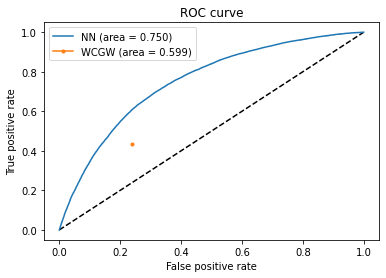

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='NN (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_wcgw[1], tpr_wcgw[1], label='WCGW (area = {:.3f})'.format(auc_wcgw), marker=".")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_keras = np.round(y_pred_keras)


In [0]:
cm = confusion_matrix(y_test, y_pred)

NameError: ignored

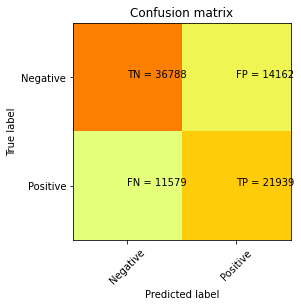

In [0]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     50950
           1       0.61      0.65      0.63     33518

    accuracy                           0.70     84468
   macro avg       0.68      0.69      0.69     84468
weighted avg       0.70      0.70      0.70     84468



Scores histogram

In [5]:
model = load_model(model_path, custom_objects={'recall_TP': recall_TP,'recall_TN': recall_TN })
y_pred_keras  = model.predict(x_test_seq)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
good_ind = []
for i in range(y_pred_keras.shape[0]):
  if int(np.round(y_pred_keras[i])) == y_test[i]:
    good_ind.append(i)


Text(0.5, 1.0, 'Histogram of NN scores - all')

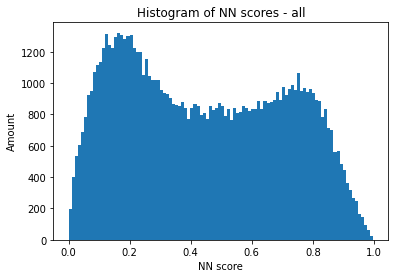

In [0]:
plt.hist(y_pred_keras, bins=100)
plt.xlabel("NN score")
plt.ylabel("Amount")
plt.title("Histogram of NN scores - all")

Text(0.5, 1.0, 'Histogram of NN scores - predicated correctly')

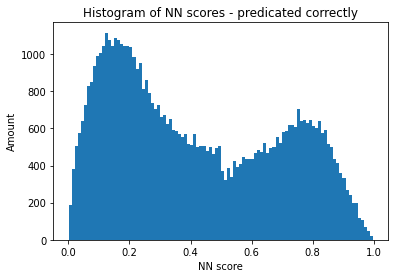

In [0]:
plt.hist(y_pred_keras[good_ind], bins=100)
plt.xlabel("NN score")
plt.ylabel("Amount")
plt.title("Histogram of NN scores - predicated correctly")

In [0]:
path_to_data = r"dataset/solo_test_with_crc10_var_0.05.pkl"
with open(path_to_data, "rb") as path_to_data_h:
      data = pickle.load(path_to_data_h)

data = data["test"]

In [0]:
seq = vecs2dna(x_test_seq)

In [0]:
data["pred"] = y_pred_keras

In [23]:
data

,meth,var,sequence,ccpg,label,data_type,seq4,seq10,pred
57,0.692383,0.230713,AAATGTTCAAAGTCCCCTGGTTAAGAAAGATCAAAGTAAGACATTC...,1,0,original,ACGT,TTCACGTTAC,0.706500
161,0.000000,0.000000,TTTAGTACAGATGGGATTTCACCATGTTGGCCAGGCTGGTCTTGAA...,1,1,original,TCGG,ACCTCGGCCT,0.809099
332,0.692383,0.230713,GAAAATGGAAAACAAAAAAAGGCAGGGGTTGCAATCCTAGTCTCTG...,1,0,original,TCGA,AGATCGAAAG,0.153300
871,0.399902,0.257080,GAGTGAGTGAATGCAGGGTCCAGCCACTACATTCAGCTAGGCATGT...,1,0,original,GCGC,CAGGCGCTGG,0.409293
1052,0.545410,0.272705,GAGACCAGCCTGGGCAACACATGGAGACCCAATTTCTACAAAAATG...,1,0,original,GCGC,GTGGCGCATG,0.208769
...,...,...,...,...,...,...,...,...,...
274210,0.000000,0.000000,GCAAAGAGAAAACAATCCTCCTGCAGACCACAGTAAATAAAATAAC...,1,1,reverse,ACGG,GTAACGGGGC,0.218819
274240,0.527832,0.249146,ACTCTAACATCAACTCCTCTAGAAAGGCTTTCCCAGAACTTTCCCC...,1,0,reverse,ACGG,CCCACGGCTA,0.555541
274264,0.000000,0.000000,TAGATTGTAGATGCTCAAAGTGTTGAGTTCCTTCTTCTTGAAAAAA...,1,1,reverse,ACGA,GAGACGAAGG,0.491102
274285,0.000000,0.000000,ATCCTGTGAGGTCCCATGGGGAGAGATCCTAAAACCTCATTGGAAA...,1,1,reverse,ACGT,TAAACGTAAA,0.733496


In [24]:
import seaborn as sns

plt.style.use('seaborn')

        

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(336.9714285714286, 0.5, 'Variance')

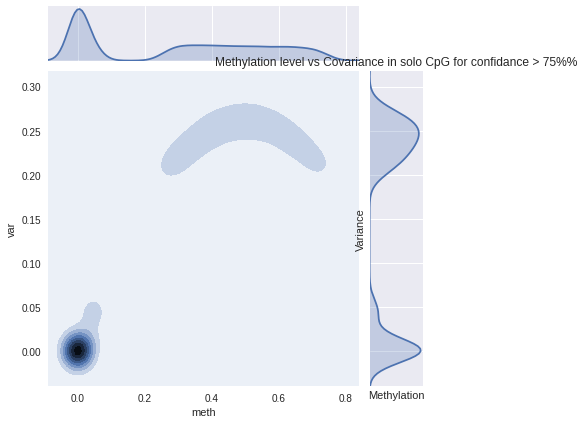

In [42]:
sns_plot = sns.jointplot(x=data[np.logical_or(data["pred"] <= 0.4, data["pred"] >= 0.6)]["meth"], y=data[np.logical_or(data["pred"] <= 0.4, data["pred"] >= 0.6)]["var"], data=data, kind="kde")
plt.title("Methylation level vs Covariance in solo CpG for confidance > 75%%")
plt.xlabel("Methylation")
plt.ylabel("Variance")

Text(336.9714285714286, 0.5, 'Variance')

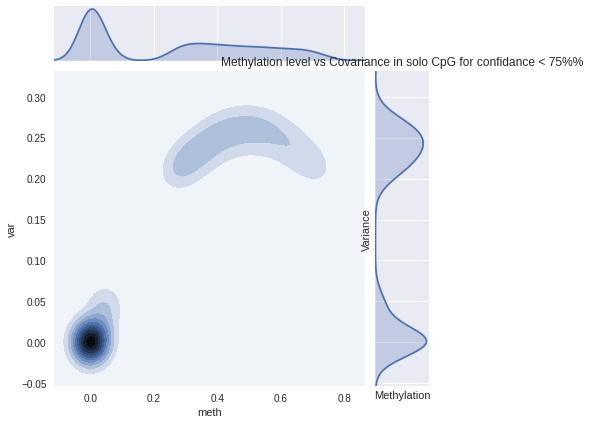

In [43]:
sns_plot = sns.jointplot(x=data[np.logical_and(data["pred"] > 0.4, data["pred"] < 0.6)]["meth"], y=data[np.logical_and(data["pred"] > 0.4, data["pred"] < 0.6)]["var"], data=data, kind="kde")
plt.title("Methylation level vs Covariance in solo CpG for confidance < 75%%")
plt.xlabel("Methylation")
plt.ylabel("Variance")

Text(0, 0.5, 'Variance')

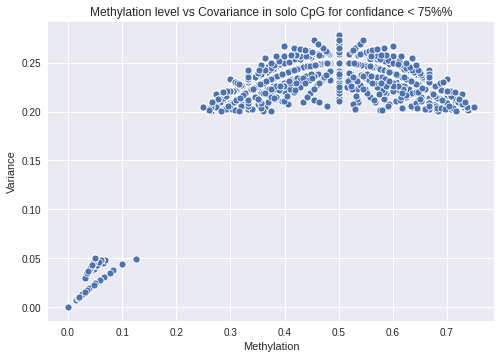

In [53]:
sns.scatterplot(x=data[np.logical_and(data["pred"] > 0.4, data["pred"] < 0.6)]["meth"], y=data[np.logical_and(data["pred"] > 0.4, data["pred"] < 0.6)]["var"], data=data,)
# sns.scatterplot(x=data[np.logical_or(data["pred"] <= 0.4, data["pred"] >= 0.6)]["meth"], y=data[np.logical_or(data["pred"] <= 0.4, data["pred"] >= 0.6)]["var"], data=data)
plt.title("Methylation level vs Covariance in solo CpG for confidance < 75%%")
plt.xlabel("Methylation")
plt.ylabel("Variance")

In [59]:
data[np.logical_or(data["pred"] <= 0.25, data["pred"] >= 0.75)]

,meth,var,sequence,ccpg,label,data_type,seq4,seq10,pred
161,0.000000,0.000000,TTTAGTACAGATGGGATTTCACCATGTTGGCCAGGCTGGTCTTGAA...,1,1,original,TCGG,ACCTCGGCCT,0.809099
332,0.692383,0.230713,GAAAATGGAAAACAAAAAAAGGCAGGGGTTGCAATCCTAGTCTCTG...,1,0,original,TCGA,AGATCGAAAG,0.153300
1052,0.545410,0.272705,GAGACCAGCCTGGGCAACACATGGAGACCCAATTTCTACAAAAATG...,1,0,original,GCGC,GTGGCGCATG,0.208769
1166,0.333252,0.242432,CCTTGCATCCTAAGGATAAAGCTTACTGGATCATGGAGGATGAGCT...,1,0,original,CCGG,TTGCCGGTAT,0.140659
1542,0.000000,0.000000,TAAAAGACACAGACTGGCAAATTGGATAAAAAGTAAAGACCCATTG...,1,1,original,ACGT,CTCACGTGCA,0.875283
...,...,...,...,...,...,...,...,...,...
273610,0.000000,0.000000,ACTGTAACCTTGACCTCCTGGGCTCAAGCAATCTTCCTACCTCAGC...,1,1,reverse,ACGC,CACACGCCAC,0.126197
273647,0.500000,0.272705,TTTGCTGAGGATGATGGTTTCCAGCTTCATCCATGTCCCTGCAAAG...,1,0,reverse,GCGT,GCTGCGTAGT,0.006696
273680,0.695801,0.221313,GTCTTGAACTCTTGACCTCAAGTGATCCACCCACCTTGGCCTCCCA...,1,0,reverse,CCGT,CCACCGTGCC,0.108481
273713,0.333252,0.233276,ACAATAGAATTAAAAGGCAACCTGTGGAATGGGAGAATATTTACAA...,1,0,reverse,CCGA,CCTCCGAAAT,0.828522


In [58]:
data[np.logical_and(data["pred"] > 0.4, data["pred"] < 0.6)]

,meth,var,sequence,ccpg,label,data_type,seq4,seq10,pred
871,0.399902,0.257080,GAGTGAGTGAATGCAGGGTCCAGCCACTACATTCAGCTAGGCATGT...,1,0,original,GCGC,CAGGCGCTGG,0.409293
4742,0.038452,0.019226,CACTTCTATTCAACATAGTATTGGAAGTCCTACCCAAGGCAATCAG...,1,1,original,TCGG,AAATCGGTAA,0.579262
4992,0.000000,0.000000,ACAGGCTCTGAAATTGAGGTAATAATTAATAGCTTATCAACCAAAA...,1,1,original,CCGA,CAGCCGAATT,0.469371
5035,0.600098,0.266602,TATAAAAGCACTACAAGAAAATCTAGGCAATACCATTCAGGACATA...,1,0,original,TCGC,AAATCGCCAA,0.467233
5059,0.000000,0.000000,AGTTGGAAAGATCTCAAATTACCAACCTAATATCACAACACATCAG...,1,1,original,CCGA,ACCCCGAAGC,0.546904
...,...,...,...,...,...,...,...,...,...
273766,0.000000,0.000000,TGCTTGTTGGCTGTCTAATTTATTAACTCCTTAATATCTGCAGCAA...,1,1,reverse,CCGA,AGACCGAGAA,0.475891
273800,0.037048,0.037048,GGGAAGCCCTGCCACCTAGACCCCCCTGAGGTCTGTATCAACTCTG...,1,1,reverse,GCGC,AGGGCGCTGT,0.529201
274087,0.000000,0.000000,AACATGAGCAGGGTTTCTGCAGTAGATAAATCCTTCAGCTCAGAAG...,1,1,reverse,ACGT,ATAACGTGAA,0.564237
274240,0.527832,0.249146,ACTCTAACATCAACTCCTCTAGAAAGGCTTTCCCAGAACTTTCCCC...,1,0,reverse,ACGG,CCCACGGCTA,0.555541
